# Unsupervised Learning - PCA

Unsupervised learning is often used to preprocess the data. Usually, that means compressing or clustering it in some meaning-preserving way like with k-Means, hieraichical clustering or PCA before feeding it to a deep neural net or another supervised learning algorithm.


## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid") # white, whitegrid, dark, darkgrid, ticks

## Importing the dataset

There is a big mall in a small city where most people go to and buy anything in the mall whatever they need. And the mall gathered some informations of to hundreds of their customers which are customers that normally subscribe the the membership card.

The mall computes spending score for each of their customer. Spending score takes values between 1 and 100.

Now the problem is that the mall would like to segment their customers into different groups but the mall has actually no idea of what this groups might be.

In [ ]:
# Import the data
mall = pd.read_csv('Mall_Customers.csv')


In [ ]:
# Let's take a look
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Now we are going to select the columns of interest which are annual income and spending score
X = mall.iloc[:, [3, 4]].values

## Hierarchical and k-Means Clustering

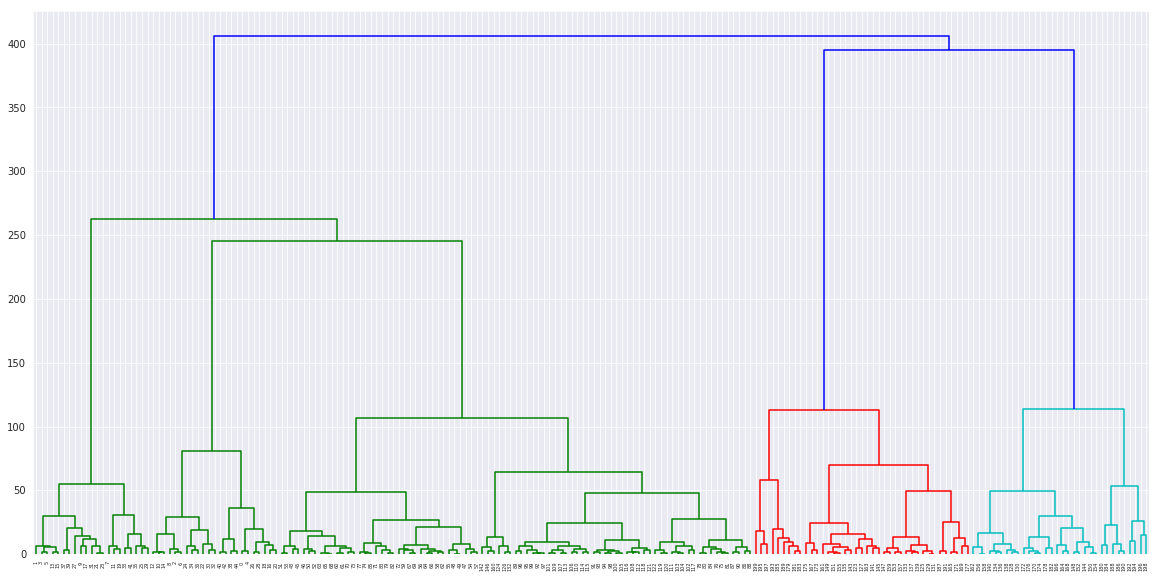

In [ ]:
# Using the code in Lecture section let's plot a Dendrogram base on the datatset

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')
plt.figure(figsize=(20, 10))
dendrogram(Z)
# Your code here

plt.show()

Looking into the dendrogram, we can see that:
* we can easily select a distance Cut-Off to have 5 clusters,
* for more than five clusters it's getting harder since the distance between smaller groups is so close.

In [ ]:
# Fitting Hierarchical Clustering to the dataset
# Your code here
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit(X).labels_

### Visualising the clusters

Let plot the data into a scatter plot with two dimensions Annual Income and Spending Score including colors represent the clusters.

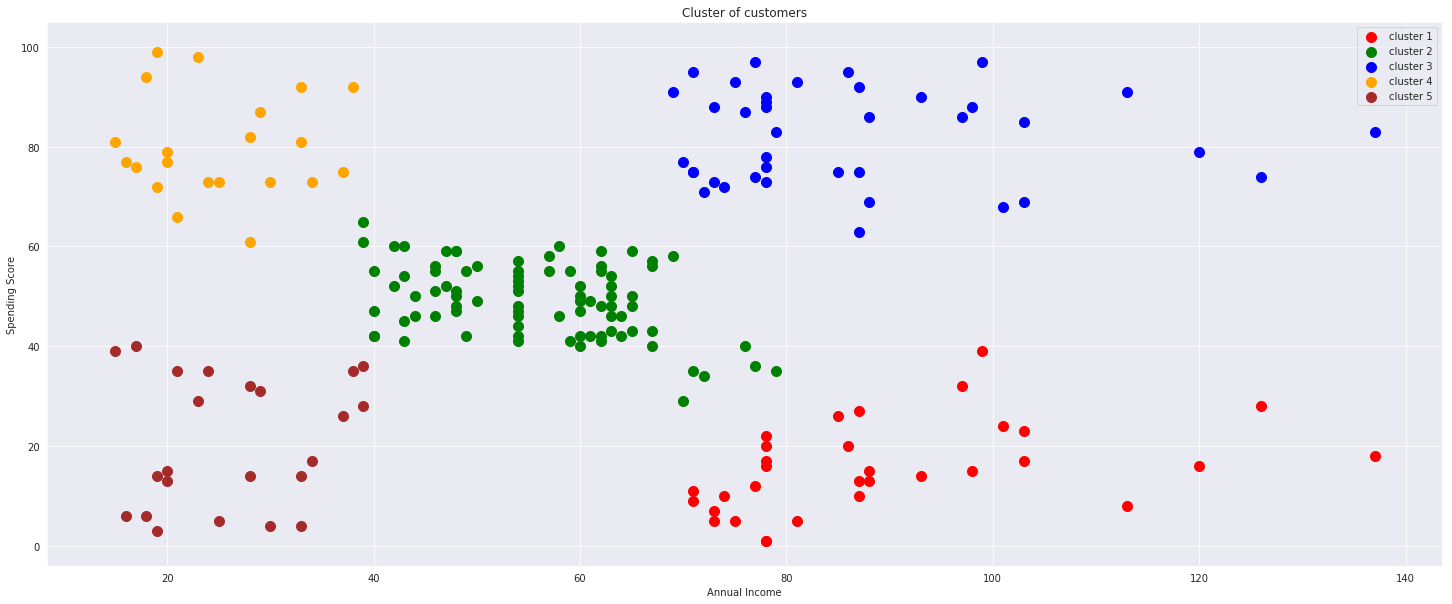

In [ ]:
# Visualising the clusters
fig = plt.figure(figsize=(25, 10))

# Plot data of the first group in a scatter plot with label 'Cluster 1', color red, size of the dot 100
# Consider that you need to filter out only data points that belong to the first group
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s = 100, c = 'r', label = 'cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s = 100, c = 'g', label = 'cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s = 100, c = 'b', label = 'cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s = 100, c = 'orange', label = 'cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s = 100, c = 'brown', label = 'cluster 5')

# Plot 4 more scatter plots for the other groups with the same style
# Your code here

# Set the title of the plot to "Cluster of customers" with the font size 50
# Your code here
plt.title("Cluster of customers")

# Set the title of the plot to "Annual Income (k$)" with the font size 30
# Your code here
plt.xlabel("Annual Income")
# Set the title of the plot to "Spending Score (1-100)" with the font size 30
# Your code here
plt.ylabel("Spending Score")
# Set the font size of the legend to 15
# Your code here
plt.legend()
plt.show()

### Apply K-Means Clustering

Let's apply K-Means Clustering for this problem and compare the result with Hierarchical Clustering.

In [ ]:
y_kmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

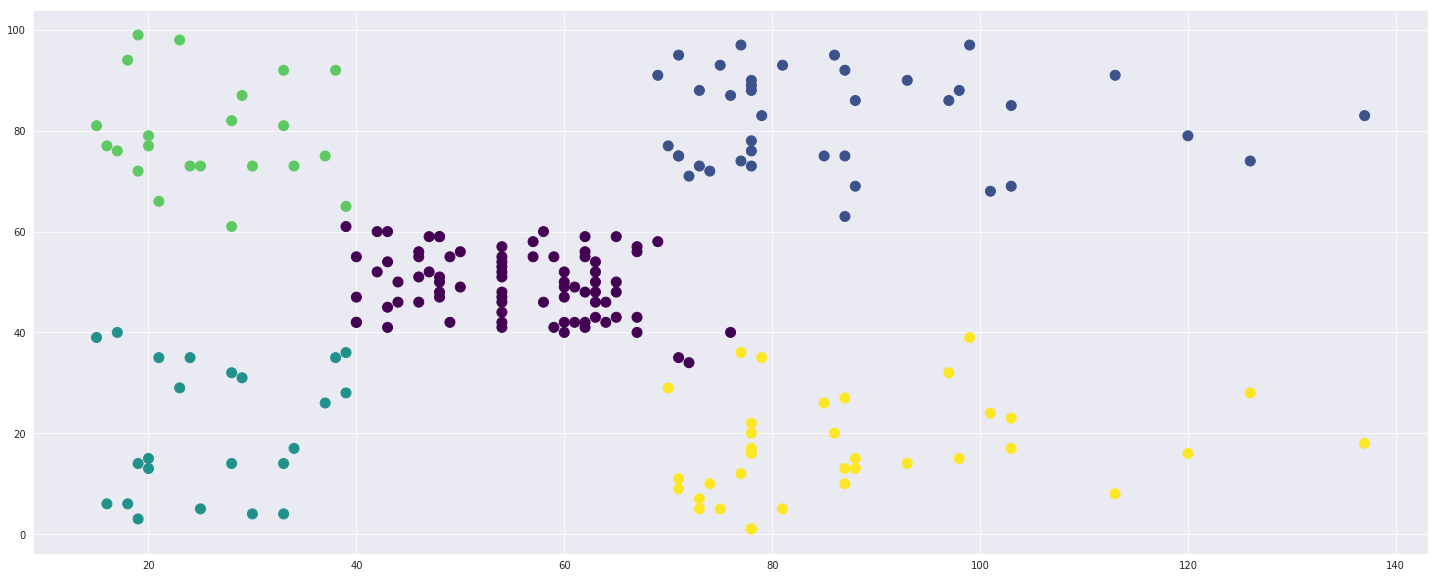

In [ ]:
# Using the code from lecture section

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

# # plot the result in a scatter plot
plt.figure(figsize=(25, 10))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis')


In [ ]:
from sklearn.metrics import accuracy_score

# now let's compare the result of both algorithms
print(accuracy_score(y_hc, y_kmeans))

# From the visualization we can see that the results are close to each other but the accuracy score here is low
# Can you explain it and how about a solution?
print(y_hc)
print(y_kmeans)



0.105
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


## Principal Component Analysis

### PCA for visualization

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. To see this, let's take a quick look at the application of PCA to the MNIST digits data

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.target[:10])

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions

In [ ]:
# Using the code in lecture section, let's find the first two principal components

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)

print(pca.components_)
print(pca.explained_variance_)

[[-1.92542799e-17 -1.73094639e-02 -2.23428828e-01 -1.35913311e-01
  -3.30323193e-02 -9.66340807e-02 -8.32943150e-03  2.26900174e-03
  -3.20516516e-04 -1.19308902e-01 -2.44451673e-01  1.48512745e-01
  -4.67319360e-02 -2.17740743e-01 -1.48136726e-02  4.47779565e-03
  -4.94136563e-05 -7.95419366e-02  8.33951512e-02  2.15915345e-01
  -1.72126797e-01 -1.63712098e-01  2.86444463e-02  4.23251802e-03
   9.85488493e-05  6.42319133e-02  2.54093317e-01 -3.56771068e-02
  -2.09462572e-01 -4.31311396e-02  5.13118680e-02  2.13422726e-04
   0.00000000e+00  1.59950883e-01  3.68690775e-01  1.64406828e-01
   8.52007930e-02  3.72982901e-02  2.15866967e-02  0.00000000e+00
   1.28865584e-03  1.06945288e-01  3.03067459e-01  2.47813045e-01
   2.09637297e-01  1.22325258e-02 -3.69458510e-02  1.61485020e-03
   6.93023529e-04 -8.35144123e-03 -5.58598952e-02  9.30534148e-02
   1.07387718e-01 -1.37734563e-01 -6.32879436e-02  9.61671089e-04
   9.55079308e-06 -1.40786826e-02 -2.35675480e-01 -1.41225597e-01
  -9.15965

We can now plot each point of the data on the 2-dimensional space of the first two principal components

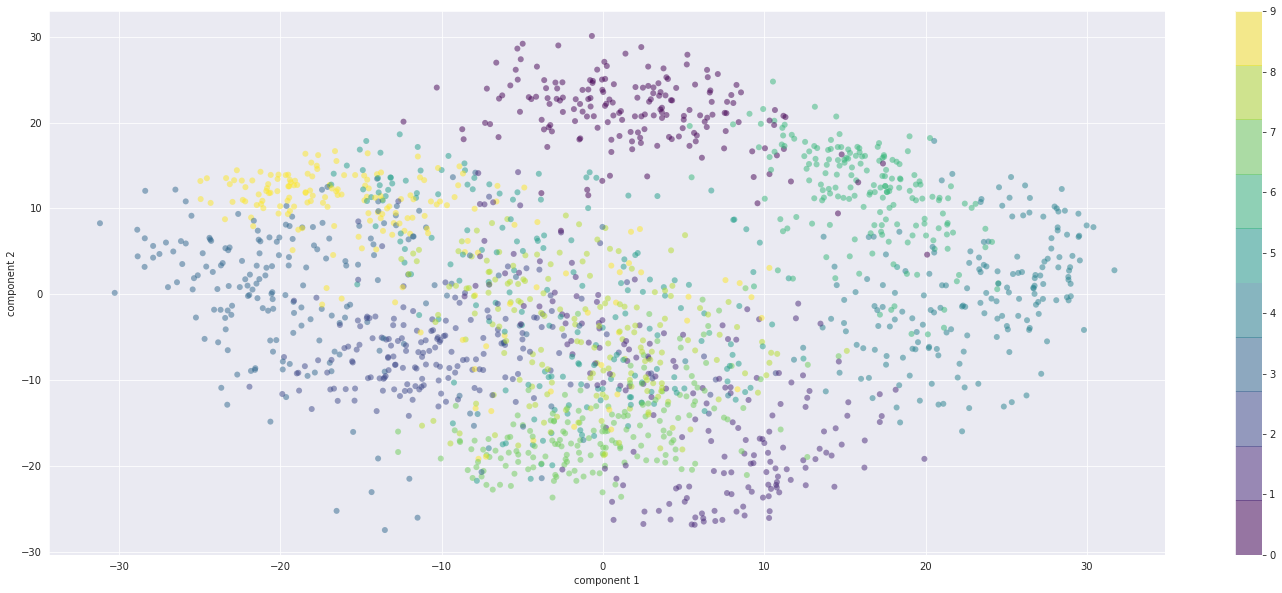

In [ ]:
projected = pca.fit_transform(digits.data)

plt.figure(figsize=(25, 10))

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:



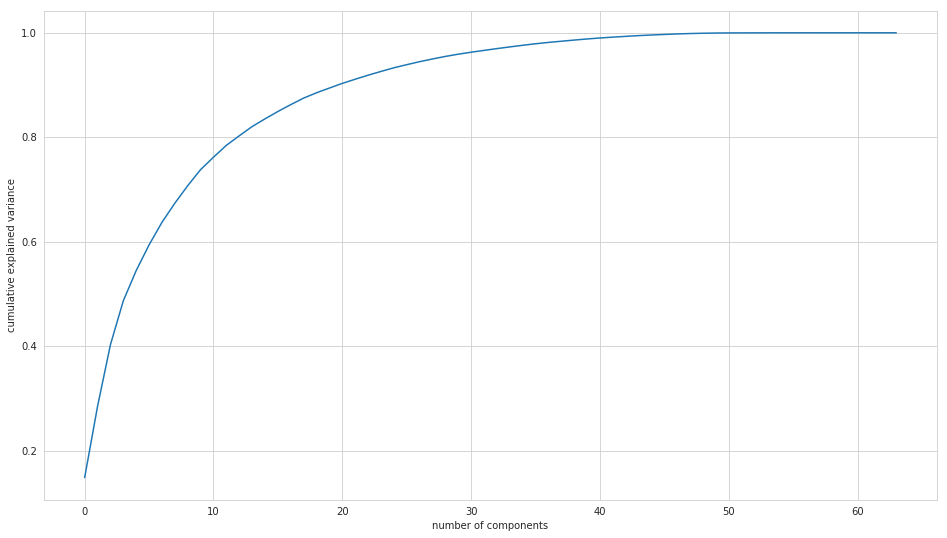

In [ ]:
sns.set_style('whitegrid')

pca = PCA().fit(digits.data)

plt.figure(figsize=(16, 9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

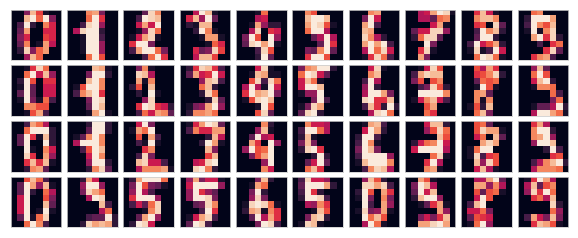

In [ ]:
def plot_images(data, height=8, width=8):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(height, width))
plot_images(digits.data)

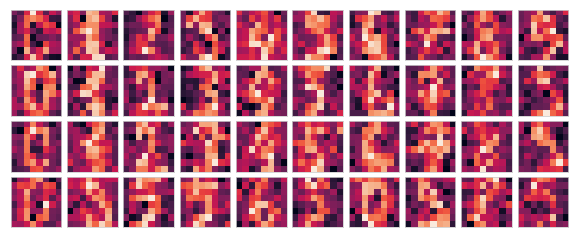

In [ ]:
# Now lets add some random noise to create a noisy dataset, and re-plot it:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_images(noisy)

Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Then use the inverse of the transform to reconstruct the filtered digits:

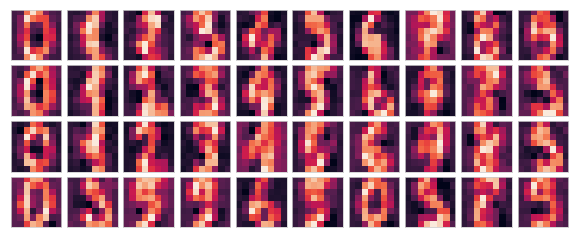

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_images(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

### PCA Example: Eigenfaces

We are using the Labeled Faces in the Wild dataset made available through Scikit-Learn:

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

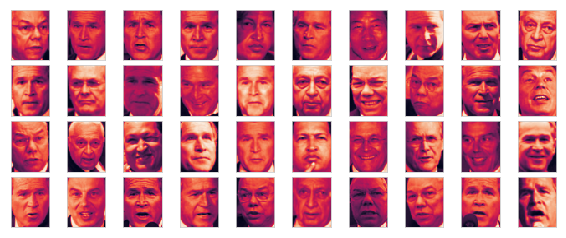

In [ ]:
plot_images(faces.images, height=62, width=47)

In [ ]:
pca = PCA().fit(faces.data)

Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

Text(0, 0.5, 'Cumulative explained variance')

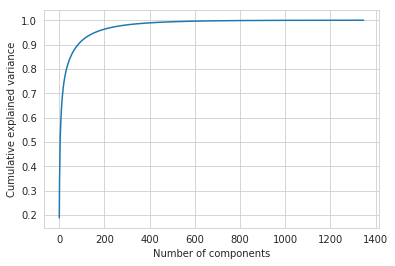

In [ ]:
# Your code here
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

We see that these 200 components account for just over 95% of the variance. That would lead us to believe that using these 200 components, we would recover most of the essential characteristics of the data.

In [ ]:
faces.data[0]

array([138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
         1.6666666 ,   0.33333334], dtype=float32)

In [ ]:
# Compute the components and projected faces
pca = PCA(n_components=200).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

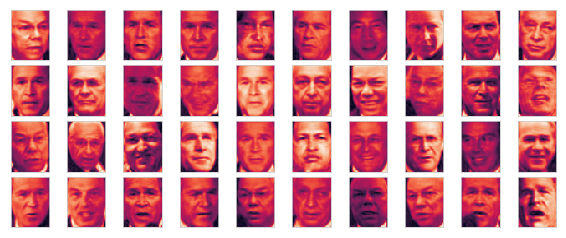

In [ ]:
# plot the reconstruction of the images from just 200 of the initial features
plot_images(projected, 62, 47)

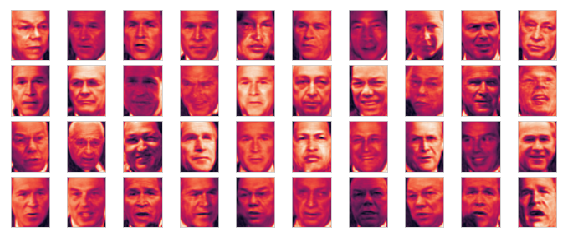

In [ ]:
# plot the input images
pca = PCA(n_components=200).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
plot_images(projected, 62, 47)

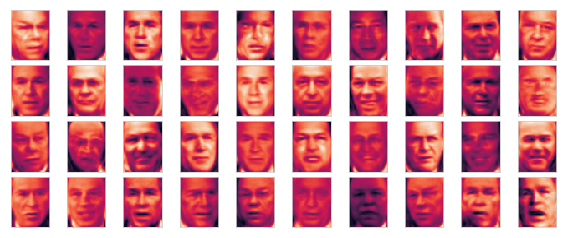

In [ ]:
# Can you reduce the dimensions more


## Great job! Hope you like it.